In [1]:
import numpy as np
import pandas as pd

/tmp/ipykernel_1995285/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

### PARKINSON DATASET
'''
x_train = np.load('TFM_MartaRey/datos/sets/X_train_40_1e5_N.npy')
y_train = np.load('TFM_MartaRey/datos/sets/y_train_40_1e5_N.npy')

x_val = np.load('TFM_MartaRey/datos/sets/X_val_40_1e5_N.npy')
y_val = np.load('TFM_MartaRey/datos/sets/y_val_40_1e5_N.npy')

x_test_real = np.load('TFM_MartaRey/datos/sets/X_test_real_N.npy')
y_test_real = np.load('TFM_MartaRey/datos/sets/y_test_real_N.npy')
'''

"\nx_train = np.load('TFM_MartaRey/datos/sets/X_train_40_1e5_N.npy')\ny_train = np.load('TFM_MartaRey/datos/sets/y_train_40_1e5_N.npy')\n\nx_val = np.load('TFM_MartaRey/datos/sets/X_val_40_1e5_N.npy')\ny_val = np.load('TFM_MartaRey/datos/sets/y_val_40_1e5_N.npy')\n\nx_test_real = np.load('TFM_MartaRey/datos/sets/X_test_real_N.npy')\ny_test_real = np.load('TFM_MartaRey/datos/sets/y_test_real_N.npy')\n"

In [3]:

### WHALES DATASET
data_train = pd.read_csv('TFM_MartaRey/datos/whale_dataset/RightWhaleCalls_train.csv')
y_train = np.array(data_train['label'])
x_train = np.array(data_train.drop(['label'], axis=1))

data_val = pd.read_csv('TFM_MartaRey/datos/whale_dataset/RightWhaleCalls_val.csv')
y_val = np.array(data_val['label'])
x_val = np.array(data_val.drop(['label'], axis=1))

data_test = pd.read_csv('TFM_MartaRey/datos/whale_dataset/RightWhaleCalls_test.csv')
y_test = np.array(data_test['label'])
x_test = np.array(data_test.drop(['label'], axis=1))


In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split
os.chdir('TFM_MartaRey/LSTM_FCN')  # Asegúrate de que esta sea la ruta correct

In [5]:
print('X train', x_train.shape)
print('X val', x_val.shape)
print('y train', y_train.shape)
print('y val', y_val.shape)
print('X test real', x_test.shape)
print('y test real', y_test.shape)

X train (7654, 4000)
X val (3280, 4000)
y train (7654,)
y val (3280,)
X test real (1962, 4000)
y test real (1962,)


In [6]:
saving_directory = 'whales_2'

if os.path.exists(saving_directory):
    shutil.rmtree(saving_directory)
    print(f"Carpeta '{saving_directory}' eliminada.")
os.makedirs(saving_directory)
print(f"Carpeta '{saving_directory}' creada.")

Carpeta 'whales_2' eliminada.
Carpeta 'whales_2' creada.


In [7]:
from lstm_fcn_pytorch.model_1_3 import Model
from lstm_fcn_pytorch.plots import plot

'''
Model architecture (source: doi: 10.1109/ACCESS.2017.2779939)
--------
    LSTM (8 units/64/128) - Dropout (0.8)
    FCN:
        * Conv1D (256 filters, kernel size 8) - BN - ReLU
        * Conv1D (128 filters, kernel size 5) - BN - ReLU
        * Conv1D (256 filters, kernel size 3) - BN - ReLU
        * GlobalAveragePooling1D
    Dense - Softmax  
'''

# Fit the model
model = Model(
    x=x_train,
    y=y_train,
    units=[8],
    filters=[128,64,128],
    kernel_sizes=[8,5,3],
    dropout=0.8,
    dropout2=0.0,
    val_data=(x_val, y_val)
)


Epoch 1, Train Loss: 0.3913, Train Accuracy: 0.8231, Val Loss: 0.4515, Val Accuracy: 0.7919
Saved best model with validation loss: 0.45145165576384616 

Epoch 2, Train Loss: 0.3812, Train Accuracy: 0.8235, Val Loss: 0.4626, Val Accuracy: 0.7897
Epoch 3, Train Loss: 0.3745, Train Accuracy: 0.8293, Val Loss: 0.4434, Val Accuracy: 0.7939
Saved best model with validation loss: 0.4433631908435088 

Epoch 4, Train Loss: 0.3716, Train Accuracy: 0.8285, Val Loss: 0.4743, Val Accuracy: 0.7805
Epoch 5, Train Loss: 0.3695, Train Accuracy: 0.8296, Val Loss: 0.4464, Val Accuracy: 0.7889
Epoch 6, Train Loss: 0.3666, Train Accuracy: 0.8336, Val Loss: 0.4524, Val Accuracy: 0.7877
Epoch 7, Train Loss: 0.3678, Train Accuracy: 0.8317, Val Loss: 0.4471, Val Accuracy: 0.7889
Epoch 8, Train Loss: 0.3665, Train Accuracy: 0.8343, Val Loss: 0.4658, Val Accuracy: 0.7822
Epoch 9, Train Loss: 0.3588, Train Accuracy: 0.8386, Val Loss: 0.4901, Val Accuracy: 0.7853
Epoch 10, Train Loss: 0.3623, Train Accuracy: 0.834

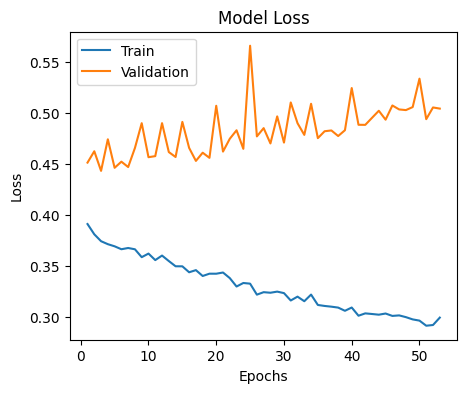

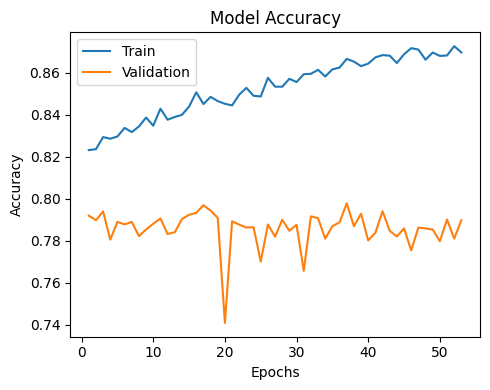

Best epoch: 3,  Train Accuracy: 0.8293, Val Accuracy: 0.7939


In [13]:
model.fit(
    learning_rate=1e-3,
    batch_size=128,
    epochs=300, 
    verbose=True,
    saving_directory = saving_directory
)

In [9]:
# Load the best model
best_model_path = 'best_model.pth'
model.load_model(best_model_path)

In [10]:
# Evaluate the model
yhat_test_r_labels, yhat_test_r = model.predict(x_test)

Final test real:
Accuracy: 0.79, Precision: 0.84, Recall: 0.72, F1 Score: 0.77, AUC: 0.79


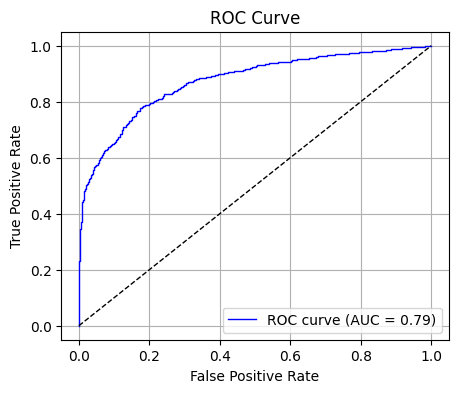

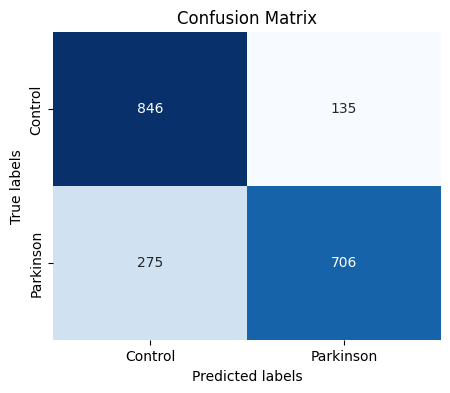

In [11]:
print('Final test real:')
metrics = model.evaluate(yhat_test_r_labels, yhat_test_r, y_test, saving_directory, class_names=['Control', 'Parkinson'])

In [12]:
for i, j in zip (y_test, yhat_test_r_labels):
    print(i,j)

0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
